In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("scraped_questionsfv.csv")
data['question'] = data['question'].str.replace('?', ' ', regex=False)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data['question'], data['personal'], test_size=0.2, random_state=42)

In [13]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [15]:
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9608626198083067

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       595
           1       0.95      0.97      0.96       657

    accuracy                           0.96      1252
   macro avg       0.96      0.96      0.96      1252
weighted avg       0.96      0.96      0.96      1252



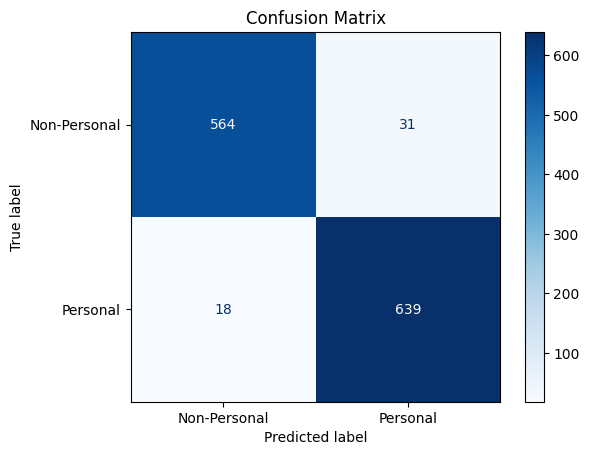

In [16]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Personal', 'Personal'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()